# Lab 4

We will work through a Gradient Descent implementation for simple functions. We will also be covering the Mini batch.


### Import statements

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt

### Quick Recap: What is Gradient Descent?

Let's say you are on a mountain and you can't see too far. You goal is to find the quickest way to the base of the mountain. Best way to go about:
1.   Search the area for the path seems to go in the **direction** of the steepest slope
2.   Take a **baby step** in that direction
3.   Repeat Step 1 and 2 till you get to the base

Using the above metaphor, you can understand the gradient descent algorithm.
\begin{align*}
w = w - \eta \nabla J(w)
\end{align*}

You can think of $w$ as the current position, $J(w)$ as a cost function (in this metaphor, it would measure the height of the position from the base), $-\nabla J(w)$ as the direction of the steepest slope, $\eta$ as the size of the baby step or the learning rate. A good choice of $\eta$ can determine the usefulness of Gradient Descent.

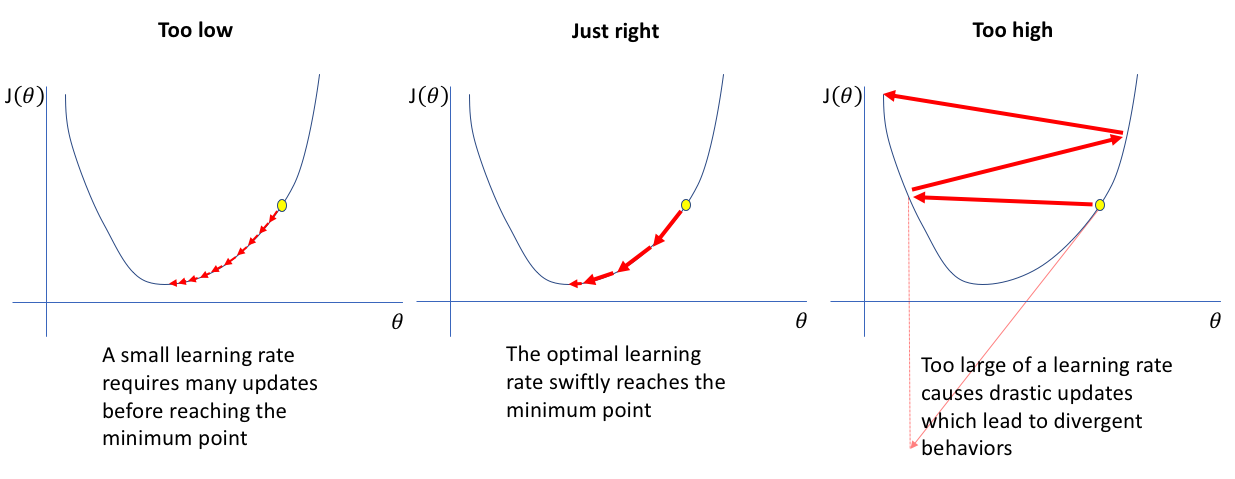

Gradient Descent Algorithms usually follow the below steps:

1.   Initialize weight
2.   Initialize your `diff` variable or a variable that keeps track of converges
3.   Initialize a variable that keeps track of the previous iteration's weights or `old_w`


Inside the while loop you want to

4.   Observe or compute you loss and keep track of the loss (append it to a list)
5.   Compute the gradient
6.   Make a gradient descent step
7.   Update `diff` variable that keeps track of convergence
8.   Update your `old_w` to be the current weight

Repeat steps 4-8 until `diff < epsilon`

9.   Plot the losses

## Example 1: 一元 gradient descent
Let's say we want to minimize $f(w) = (w -2)^2$ and find the minimizer

\begin{align*}
\frac{\partial f(w)}{\partial w} &= 2w - 4\\
\end{align*}

These are helper functions for the gradient descent algorithm

In [ ]:
def gradient_w_square(w):
  return 2*w - 4

def f_w_square(w):
  return (w - 2)**2

In [ ]:
def w_square_grad_descent(epsilon, initial_w = 10, eta = 0.1):
  # Step 1: Initialize weight
  w = initial_w
  f_val = []

  # Step 2: Initialize the diff variable to check convergence in each iteration
  diff = 1

  # Step 3: Initialize the previous weight variable
  old_w = w
  i = 0
  while diff > epsilon:

    # Step 4: Observe your loss and keep track of it
    f_w = f_w_square(w)
    f_val.append(f_w)

    # Step 5: Compute gradient with current weight
    grad_w = gradient_w_square(w)

    # Step 6: Make gradient descent step
    w = w - eta * grad_w

    # Step 7: Update diff variable according to convergence condition
    diff = abs(old_w - w)

    # Step 8: Update previous weight variable
    old_w = w
    if i % 50 == 0:
      print("Step {}: Current value of f(w) is {}, w is {}.".format(i + 1, round(f_val[i], 5), round(w,5)))
    i = i + 1

  # Step 9: Plot the losses
  plt.plot(range(1, len(f_val)+1), f_val, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.show()
  return w, f_val

Step 1: Current value of f(w) is 64, w is 9.84.
Step 51: Current value of f(w) is 8.48765, w is 4.85509.
Step 101: Current value of f(w) is 1.12563, w is 3.03974.
Step 151: Current value of f(w) is 0.14928, w is 2.37864.
Step 201: Current value of f(w) is 0.0198, w is 2.13789.
Step 251: Current value of f(w) is 0.00263, w is 2.05022.
Step 301: Current value of f(w) is 0.00035, w is 2.01829.
Step 351: Current value of f(w) is 5e-05, w is 2.00666.
Step 401: Current value of f(w) is 1e-05, w is 2.00243.
Step 451: Current value of f(w) is 0.0, w is 2.00088.


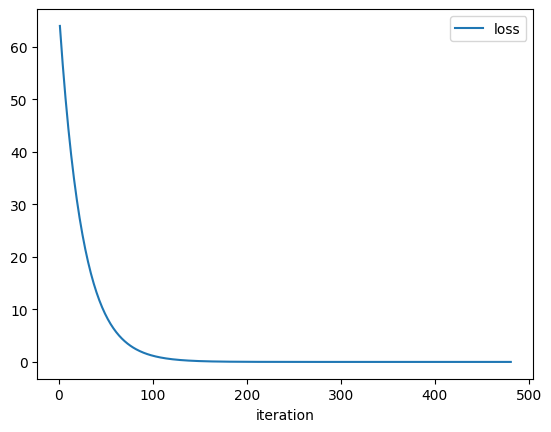

In [ ]:
w, f_val = w_square_grad_descent(epsilon = 0.00001, initial_w = 10, eta= 0.01)

In this case, the loss is how far $f(w)$ is from $0$ so the loss is just $f(w)$.

The results seem to be very close to the true minimum 2. Furthermore, the loss values are monotonically decreasing as we increase the number of iterations.

Now lets try with a harder function with two variables

## Example 2: 二元 grandient descent

Algorithm for $f(w_1, w_2) = (1-w_1)^2 + 100 (w_2 - w_1^2)^2$

\begin{align*}
\frac{\partial f(w_1, w_2)}{\partial w_1} &= -2(1-w_1) - 400(w_2 - w_1^2)w_1 \\
\frac{\partial f(w_1, w_2)}{\partial w_2} &= 200(w_2 - w_1^2) \\
\end{align*}

Helper functions:

In [ ]:
def fw(w_1, w_2): # 原函数
    fw = (np.power((1 - w_1), 2)
          + 100 * np.power((w_2 - np.power(w_1, 2)), 2))
    return fw

In [ ]:
def Dfw(w_1, w_2): # 偏导数
    Dfw = (-2 * (1 - w_1) - 400 * (w_2 - np.power(w_1, 2)) * w_1,
          200 * (w_2 - np.power(w_1, 2)))

    return Dfw

### 如何根据函数表达式画出3d图

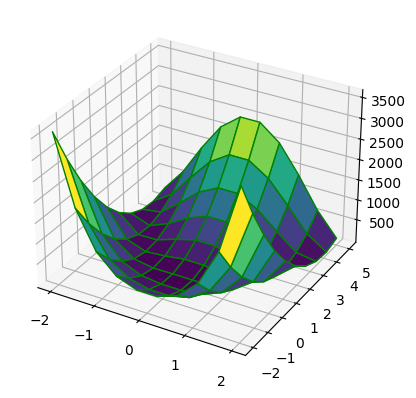

In [ ]:
w_1 = np.outer(np.linspace(-2, 2, 10), np.ones(10))
w_2 = np.outer(np.linspace(-2, 5, 10), np.ones(10)).T
# w_1, w_2 是用离散模拟连续的二维坐标系
z = fw(w_1, w_2)

fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')

# syntax for plotting
ax.plot_surface(w_1, w_2, z, cmap ='viridis', edgecolor ='green')
plt.show()

For this implementation, we will consider a convergence condition

In [ ]:
def f_grad_descent(epsilon = 0.001, initial_w_1 = -1.2, initial_w_2 = 1, eta = 0.1):
  w_1 = initial_w_1
  w_2 = initial_w_2

  old_w_1 = w_1
  old_w_2 = w_2

  f_val = []  # loss的历史值存放处
  diff = 1000
  i = 0
  while diff > epsilon:
    f_w = fw(w_1, w_2) # 目前的loss值
    f_val.append(f_w) # 添加到历史里
    grad_w_1, grad_w_2 = Dfw(w_1, w_2)  # grad
    w_1 = w_1 - eta * grad_w_1  # weight分量1 grad descent
    w_2 = w_2 - eta * grad_w_2  # weight分量2 grad descent
    if i % 500 == 0:
      print("Step {}: Current value of f(w) is {}, w is {}.".format(i + 1,
                              round(f_val[i], 3), np.round(np.array([w_1, w_2]),3)))

    if i > 0:
      diff = abs(w_1 - old_w_1) + abs(w_2 - old_w_2)
      #diff =

    old_w_1 = w_1
    old_w_2 = w_2
    i = i + 1

  # 绘制 loss 历史
  plt.plot(range(1, len(f_val)+1), f_val, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.show()

  return (w_1, w_2), f_val

Step 1: Current value of f(w) is 24.2, w is [-0.877  1.132].
Step 501: Current value of f(w) is 1.037, w is [-0.015  0.001].
Step 1001: Current value of f(w) is 0.158, w is [0.604 0.363].
Step 1501: Current value of f(w) is 0.056, w is [0.763 0.581].
Step 2001: Current value of f(w) is 0.025, w is [0.844 0.711].
Step 2501: Current value of f(w) is 0.012, w is [0.892 0.796].
Step 3001: Current value of f(w) is 0.006, w is [0.924 0.853].
Step 3501: Current value of f(w) is 0.003, w is [0.945 0.894].
Step 4001: Current value of f(w) is 0.002, w is [0.961 0.922].
Step 4501: Current value of f(w) is 0.001, w is [0.971 0.943].
Step 5001: Current value of f(w) is 0.0, w is [0.979 0.958].
Step 5501: Current value of f(w) is 0.0, w is [0.985 0.969].
Step 6001: Current value of f(w) is 0.0, w is [0.989 0.977].
Step 6501: Current value of f(w) is 0.0, w is [0.992 0.983].
Step 7001: Current value of f(w) is 0.0, w is [0.994 0.988].


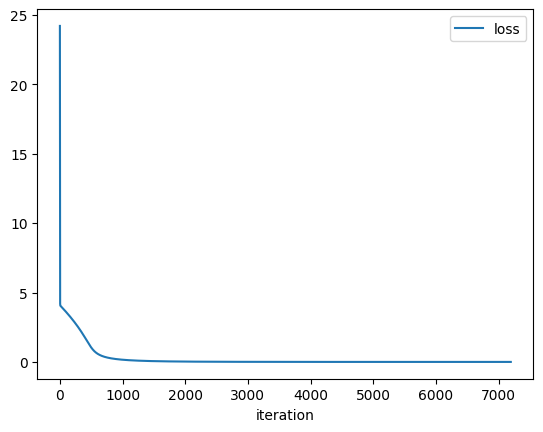

In [ ]:
w, f_val = f_grad_descent(epsilon = 1e-5, eta= 0.0015)

### Exercises
---

**EXERCISE 1**

(a) code the gradient descent algorithm to optimize (find the minimum value) of the function:

$$f(w_1,w_2) = (w_1 - 3)^2 + 3(w_2 - 2)^2$$
$$\nabla f(w_1,w_2) = (2(w_1 - 3), 6(w_2 - 2))$$

(b) run your algorithm setting the initial values and plot the losses

---

## Example 3: 多元 Gradient descent

The previous functions just depend on parameters $(w_1, w_2)$ but we are interested in optimizing loss functions that depend on data $(X, y)$. Lets review a toy example using some simulated data. Let

Consider an array $X \in \mathbb{R}^{n \times p}$ where each $x_i \in \mathbb{R}^{p}$. Our goal is to find the parameter $w \in \mathbb{R}^{p}$ that we minimizes the sum of the squared L2 distance between x and w, i.e.

$$L(w) = \frac{1}{n} \sum_i^n \|x_i - w\|^2_2$$
$$\nabla L(w) = \frac{-2}{n} \sum_i^n (x_i - w)$$

In [3]:
np.random.seed(2)
X = np.random.normal(size = (100, 5))
initial_w = np.random.random(size = (5,))

In [4]:
def loss_w(X, w):
  n, p = X.shape
  return 1/n * np.sum(np.square(X - w)) # example of broadcasting

def gradient_w(X, w):
  return (-2)*np.mean(X - w, axis = 0)

In [5]:
def eps_mean_grad_descent(X, initial_w, eta = 0.1, epsilon = 0.001):
  w = initial_w
  old_w = w
  n = X.shape[0]
  diff = 1.0
  # print(n)
  i = 0
  losses = []
  while diff > epsilon:
    loss = loss_w(X, w)
    losses.append(loss)
    grad_w = gradient_w(X, w)
    w = w - eta * grad_w
    if i % 50 == 0:
      print("Step {}: Current loss is {}, parameter (w) is {}.".format(i + 1, round(losses[i],4),  w))
    i = i + 1
    diff = (np.absolute(old_w - w)).max()
    old_w = w

  # Loss plot

  plt.plot(range(1, len(losses)+1), losses, label = "loss")
  plt.legend()
  plt.xlabel("iteration")
  plt.show()
  return w, losses

Step 1: Current loss is 6.8185, parameter (w) is [0.18596453 0.43068677 0.38305478 0.69768677 0.05064307].
Step 51: Current loss is 5.2738, parameter (w) is [ 0.06258645 -0.03694308 -0.20393324  0.05733765  0.04091053].


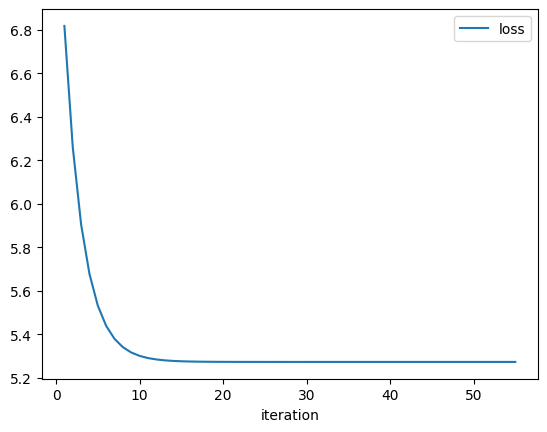

In [6]:
w, losses = eps_mean_grad_descent(X,  initial_w = initial_w, eta = 0.1, epsilon = 0.000001)

As you might know, the previous problem it is easly solved by calculating the mean.

In [7]:
np.mean(X, axis = 0), w

(array([ 0.06258469, -0.03694975, -0.20394161,  0.05732851,  0.04091039]),
 array([ 0.06258541, -0.03694702, -0.20393818,  0.05733225,  0.04091044]))

# Mini batch gradient descent


The main idea of using mini batch in an optimization problem is to avoid doing operations with the whole dataset because the sample size can be very high and the operations can be computational intensive. But the same logic can be applied for other goals. Lets check a toy example:

We want to calculate the sample standard deviation of an array x with sample size $n$. The sample standard deviation is defined by:

$$ std = (\frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})^2)^{\frac{1}{2}}$$

In [9]:
x = np.random.rand(1000, 1)

In this toy example we can of course calculate it directly

In [10]:
x.std()

0.29408703525603375

But now lets try to apply minibatch to approximate this value. In other words, we will split the data into batches and calculate the standard deviation for each batch and then take the mean of all approximations:

Given the sample size $n=1000$, lets consider a batch size of $|B|= 100$, this gives us $m = n/|B| = 10$ number of batches.

First step, we need to split the data randomly into batches with the given batch size:

In [11]:
# 一共多少个数据点
n = x.shape[0]
# 每份100个数据点
batch_size = 100
# 除一下看看一共有多少份
num_batches = (n // batch_size)
# 打乱数据
np.random.shuffle(x)
# 现在可以分batch了
batches = [x[j * batch_size:(j + 1)*batch_size] for j in range(num_batches)] #列表推导式, 创建一些batches
# 数组的数组, 这就像一个集合的集合, 一共有10个元素, 每个元素是一个100个数据点的数组
len(batches)

10

Now we can calculate the sample standard deviation for each batch

In [12]:
std_list = [b.std() for b in batches] # 10个array, 每个array的数据的标准差
std_list

[0.2764462919144906,
 0.28401265150212457,
 0.28940247697085203,
 0.3170280160040045,
 0.2888625851922969,
 0.2812325209670304,
 0.2885937068734357,
 0.3100470444704588,
 0.28611065550389475,
 0.3074502633395305]

Finally, we can give a final estimation of the sample standard deviation

In [13]:
np.mean(std_list)

0.29291862127381185

Note that this example worked witout problems because the sample size is a multiple of the batch size. But what if this is not the case?

## Exercises
---

**EXERCISE 2**

(a) Create an array with the first 1005 random numbers

(b) apply mini batch to estimate the sample standard deviation with a batch size of 100

(**hint**: you need to give a special treatment to the last batch)

---

In [14]:
n = 1005
x = np.random.rand(n, 1)
batch_size = 100
num_batches = (n // batch_size)
batches = [x[j * batch_size:(j + 1)*batch_size] for j in range(num_batches)] #列表推导式, 创建一些batches
std_list = [b.std() for b in batches]
print(batches[0].size)
print(std_list)

100
[0.2888199926065465, 0.2749346060475993, 0.2962544075171205, 0.2788427269292741, 0.2942108920420812, 0.2659832193251514, 0.296220767045436, 0.28230243699401725, 0.2916035684011893, 0.2984391012213323]


Something importan to mention is that in an optimization context our goal is to optimize (minimize) a loss function. But we can use the same ideas explained here.